#  QXD0140 - Equações Diferenciais

**AP1 2025.2**

**Campus:** Quixadá  
**Professor:** Rodolfo Coutinho  
**Aluna:** Ana Alicy Ribeiro dos Santos  


In [1]:
# Importando bibliotecas necessárias
import numpy as np                      # Operações numéricas e arrays
import matplotlib.pyplot as plt         # Criação de gráficos
import sympy as sp                      # Matemática simbólica
from scipy.integrate import solve_ivp   # Solução numérica de EDOs

# Definindo variáveis simbólicas
# real=True informa ao SymPy que x é um número real (não complexo), Isso permite simplificações matemáticas mais precisas, como:
# - sqrt(x²) = |x| em vez de sqrt(x²)
# - Melhor manipulação de logaritmos e exponenciais
# - Evita soluções complexas desnecessárias em EDOs reais
x = sp.symbols('x', real=True)

# Define y como uma função simbólica de x para resolver EDOs
y = sp.Function('y')

# Constantes de integração usadas nas soluções gerais
C1, C2 = sp.symbols('C1 C2')


#  **QUESTÃO 1** - Determine a solução geral das EDOs



# **Questão 1a** $y' + y = e^{-x}$

**Tipo:** Equação Diferencial Linear de 1ª Ordem



**Passo 1: Escrevendo a equação**

A equação diferencial é dada por:

$$\frac{dy}{dx} + y = e^{-x}$$



 **Passo 2: Identificando P(x) e Q(x)**

Reescrevendo na forma padrão:

$$\frac{dy}{dx} + P(x)y = Q(x)$$

Temos: $P(x) = 1$ e $Q(x) = e^{-x}$



 **Passo 3: Calculando o fator integrante**

O fator integrante é dado por:

$$\mu(x) = e^{\int P(x)dx} = e^{\int 1 \, dx} = e^x$$



 **Passo 4: Multiplicando toda equação por** $\mu(x)$

$$e^x \cdot \frac{dy}{dx} + e^x \cdot y = e^x \cdot e^{-x}$$

$$e^x \cdot \frac{dy}{dx} + e^x \cdot y = 1$$

Aplicando a regra do produto (derivada de produto):

$$\frac{d}{dx}[e^x \cdot y] = 1$$



**Passo 5: Integrando ambos os lados**

$$\int \frac{d}{dx}[e^x \cdot y] \, dx = \int 1 \, dx$$

$$e^x \cdot y = x + C$$



 **Passo 6: Isolando y**

$$y = \frac{x + C}{e^x}$$





In [2]:
from IPython.display import display, Markdown

# Resolução simbólica com SymPy
display(Markdown("### **Verificação Simbólica para** $y' + y = e^{-x}$:"))

ode_1a = sp.Eq(y(x).diff(x) + y(x), sp.exp(-x))
solucao_1a = sp.dsolve(ode_1a, y(x))

display(solucao_1a)

### **Verificação Simbólica para** $y' + y = e^{-x}$:

Eq(y(x), (C1 + x)*exp(-x))

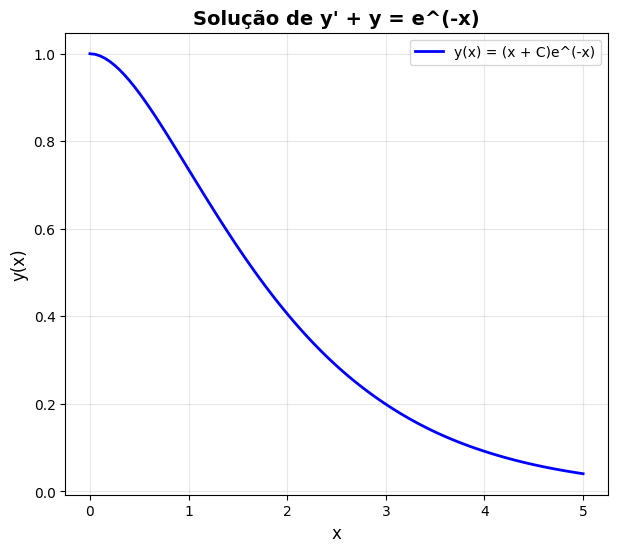

---

In [3]:
# Resolução numérica para visualização
def modelo_1a(t, y):
    return np.exp(-t) - y

y0_1a = [1]  # Condição inicial: y(0) = 1
t_span_1a = (0, 5)
t_eval_1a = np.linspace(0, 5, 100)
sol_1a_num = solve_ivp(modelo_1a, t_span_1a, y0_1a, t_eval=t_eval_1a)

# Plotando o gráfico
plt.figure(figsize=(7, 6))
plt.plot(sol_1a_num.t, sol_1a_num.y[0], 'b-', linewidth=2, label='y(x) = (x + C)e^(-x)')
plt.title("Solução de y' + y = e^(-x)", fontsize=14, fontweight='bold')
plt.xlabel("x", fontsize=12)
plt.ylabel("y(x)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

display(Markdown("---"))



# **Questão 1b** $y' - x^2y^2 = 0$

**Tipo:** Equação Diferencial Separável (Bernoulli)



**Passo 1: Escrevendo a equação**

A equação diferencial é dada por:

$$y' - x^2y^2 = 0$$

Que pode ser reescrita como:

$$y' = x^2y^2$$

Ou na forma diferencial:

$$\frac{dy}{dx} = x^2y^2$$



**Passo 2: Separando as variáveis**

Vamos separar as variáveis $y$ e $x$. Dividindo ambos os lados por $y^2$ e multiplicando por $dx$:

$$\frac{dy}{y^2} = x^2 \, dx$$

Reescrevendo:

$$\frac{1}{y^2} dy = x^2 \, dx$$

Ou ainda:

$$y^{-2} dy = x^2 \, dx$$



 **Passo 3: Integrando ambos os lados**

Agora vamos integrar os dois lados:

$$\int y^{-2} \, dy = \int x^2 \, dx$$

**Cálculo da Integral y:**

$$\int y^{-2} \, dy = \frac{y^{-1}}{-1} = -\frac{1}{y}$$

**Cálculo da Integral x:**

$$\int x^2 \, dx = \frac{x^3}{3} + C_1$$



 **Passo 4: Conferindo e aplicando os resultados**

Igualando as integrais:

$$-\frac{1}{y} = \frac{x^3}{3} + C_1$$

Reorganizando (absorvendo $C_1$ em uma nova constante $C_2$):

$$-\frac{1}{y} + C_1 = \frac{x^3}{3} + C_2$$

Simplificando (chamando $C = C_2 - C_1$):

$$-\frac{1}{y} = \frac{x^3}{3} + C_3$$



 **Passo 5: Isolando y**

Multiplicando ambos os lados por $-1$:

$$\frac{1}{y} = -\frac{x^3}{3} - C_3$$

$$\frac{1}{y} = -\left(\frac{x^3}{3} + C_3\right)$$

Invertendo:

$$y = \frac{-1}{\frac{x^3}{3} + C_3}$$

Simplificando (renomeando $C_4 = 3C_3$):

$$y = \frac{-3}{x^3 + C_4}$$



**Solução Geral:**

$$\boxed{y = \frac{-3}{x^3 + C}}$$

Onde $C$ é uma constante de integração arbitrária.




In [4]:
from IPython.display import display, Markdown

# Resolução simbólica com SymPy
display(Markdown("### **Verificação Simbólica para** $y' - x^2y^2 = 0$:"))

ode_1b = sp.Eq(y(x).diff(x) - x**2 * y(x)**2, 0)
solucao_1b = sp.dsolve(ode_1b, y(x))

display(solucao_1b)



### **Verificação Simbólica para** $y' - x^2y^2 = 0$:

Eq(y(x), -3/(C1 + x**3))

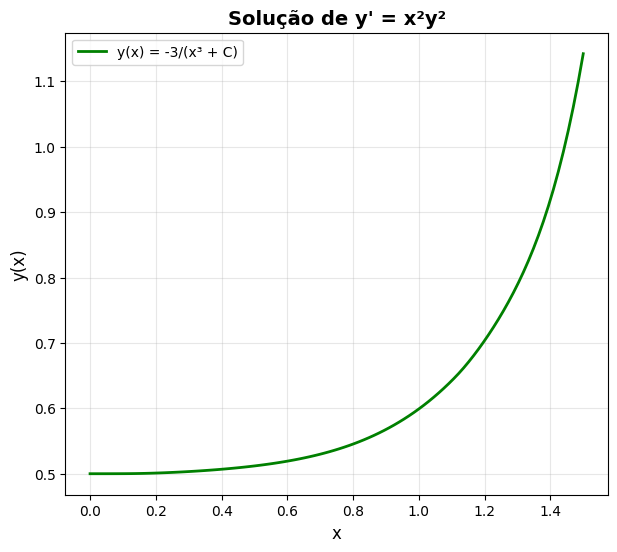

---

In [5]:
# Resolução numérica
def modelo_1b(t, y):
    return t**2 * y**2

y0_1b = [0.5]  # Condição inicial: y(0) = 0.5
t_span_1b = (0, 1.5)
t_eval_1b = np.linspace(0, 1.5, 100)
sol_1b_num = solve_ivp(modelo_1b, t_span_1b, y0_1b, t_eval=t_eval_1b)

# Plotando o gráfico
plt.figure(figsize=(7, 6))
plt.plot(sol_1b_num.t, sol_1b_num.y[0], 'g-', linewidth=2, label='y(x) = -3/(x³ + C)')
plt.title("Solução de y' = x²y²", fontsize=14, fontweight='bold')
plt.xlabel("x", fontsize=12)
plt.ylabel("y(x)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

display(Markdown("---"))



# **Questão 1c** $2xy + 3 + (x^2 + 2y)y' = 0$

**Tipo:** Equação Diferencial Exata



 **Passo 1: Escrevendo a equação na forma padrão**

A equação diferencial é dada por:

$$2xy + 3 + (x^2 + 2y)y' = 0$$

Podemos reescrever como:

$$M(x,y) + N(x,y) \frac{dy}{dx} = 0$$

Onde:
- $M(x,y) = 2xy + 3$
- $N(x,y) = x^2 + 2y$



 **Passo 2: Verificando se a equação é exata**

Uma equação é exata se:

$$\frac{\partial M}{\partial y} = \frac{\partial N}{\partial x}$$

**Calculando** $\frac{\partial M}{\partial y}$:

$$\frac{\partial M}{\partial y} = \frac{\partial}{\partial y}(2xy + 3) = 2x$$

**Calculando** $\frac{\partial N}{\partial x}$:

$$\frac{\partial N}{\partial x} = \frac{\partial}{\partial x}(x^2 + 2y) = 2x$$

Como $\frac{\partial M}{\partial y} = \frac{\partial N}{\partial x} = 2x$, a equação **é exata**! ✓



**Passo 3: Encontrando a função potencial** $\phi(x,y)$

Para uma equação exata, existe uma função $\phi(x,y)$ tal que:

$$\frac{\partial \phi}{\partial x} = M(x,y) \quad \text{e} \quad \frac{\partial \phi}{\partial y} = N(x,y)$$

**Integrando M em relação a x:**

$$\phi(x,y) = \int M(x,y) \, dx = \int (2xy + 3) \, dx$$

$$\phi(x,y) = x^2y + 3x + g(y)$$

onde $g(y)$ é uma função arbitrária de $y$ apenas.



 **Passo 4: Determinando** $g(y)$

Derivando $\phi(x,y)$ em relação a $y$:

$$\frac{\partial \phi}{\partial y} = \frac{\partial}{\partial y}(x^2y + 3x + g(y)) = x^2 + g'(y)$$

Mas sabemos que $\frac{\partial \phi}{\partial y} = N(x,y) = x^2 + 2y$, então:

$$x^2 + g'(y) = x^2 + 2y$$

$$g'(y) = 2y$$

Integrando:

$$g(y) = \int 2y \, dy = y^2 + C_1$$



 **Passo 5: Função potencial completa**

Substituindo $g(y)$ em $\phi(x,y)$:

$$\phi(x,y) = x^2y + 3x + y^2$$



 **Passo 6: Solução geral**

A solução da equação exata é dada por:

$$\phi(x,y) = C$$

Portanto:

$$x^2y + 3x + y^2 = C$$



 **Solução Geral:**

$$\boxed{x^2y + 3x + y^2 = C}$$

Onde $C$ é uma constante arbitrária.


In [6]:
from IPython.display import display, Markdown

# Verificação da exatidão
display(Markdown("### **Verificação de Exatidão para** $2xy + 3 + (x^2 + 2y)y' = 0$:"))

x_sym, y_sym = sp.symbols('x y', real=True)

# Definindo M e N
M = 2*x_sym*y_sym + 3
N = x_sym**2 + 2*y_sym

# Calculando as derivadas parciais
M_y = sp.diff(M, y_sym)
N_x = sp.diff(N, x_sym)

# Exibindo formatado em LaTeX
display(Markdown(f"**M(x,y)** = ${sp.latex(M)}$"))
display(Markdown(f"**N(x,y)** = ${sp.latex(N)}$"))
display(Markdown(f"**∂M/∂y** = ${sp.latex(M_y)}$"))
display(Markdown(f"**∂N/∂x** = ${sp.latex(N_x)}$"))

if M_y == N_x:
    display(Markdown(" **A equação é EXATA!**"))
    
    # Encontrando a função potencial
    phi = sp.integrate(M, x_sym) + sp.integrate(N - sp.diff(sp.integrate(M, x_sym), y_sym), y_sym)
    phi = sp.simplify(phi)
    
    display(Markdown(f"**Função potencial φ(x,y)** = ${sp.latex(phi)}$"))
    display(Markdown(f"**Solução implícita:** ${sp.latex(phi)} = C$"))
else:
    display(Markdown(" A equação NÃO é exata."))


### **Verificação de Exatidão para** $2xy + 3 + (x^2 + 2y)y' = 0$:

**M(x,y)** = $2 x y + 3$

**N(x,y)** = $x^{2} + 2 y$

**∂M/∂y** = $2 x$

**∂N/∂x** = $2 x$

 **A equação é EXATA!**

**Função potencial φ(x,y)** = $x^{2} y + 3 x + y^{2}$

**Solução implícita:** $x^{2} y + 3 x + y^{2} = C$

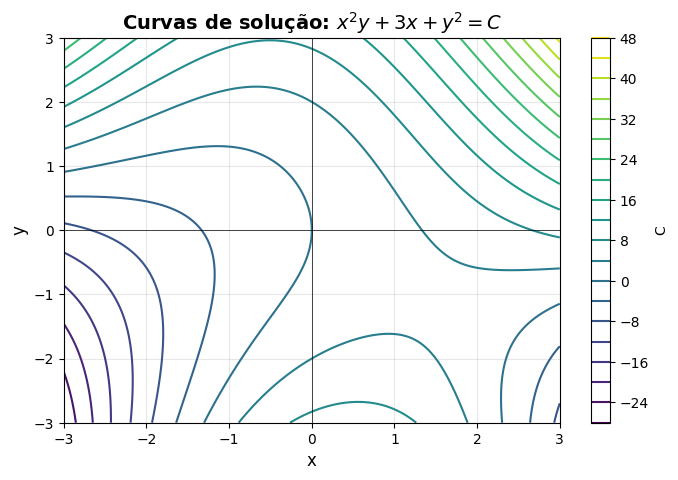

---

In [7]:
# Plotando curvas de nível (solução implícita)
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-3, 3, 300)
y_vals = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x_vals, y_vals)

# Função potencial: x²y + 3x + y² = C
F = X**2 * Y + 3*X + Y**2

plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, F, levels=20, cmap='viridis')
plt.colorbar(contours, label='C')
plt.title("Curvas de solução: $x^2y + 3x + y^2 = C$", fontsize=14, fontweight='bold')
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

display(Markdown("---"))




# **Questão 1d** $y' + 2y = 4$

**Tipo:** Equação Diferencial Linear de 1ª Ordem


 **Passo 1: Escrevendo a equação na forma padrão**

A equação diferencial é dada por:

$$y' + 2y = 4$$

Na forma padrão: $\frac{dy}{dx} + P(x)y = Q(x)$

Temos: $P(x) = 2$ e $Q(x) = 4$



**Passo 2: Calculando o fator integrante**

O fator integrante é:

$$\mu(x) = e^{\int P(x) \, dx} = e^{\int 2 \, dx} = e^{2x}$$



 **Passo 3: Multiplicando a equação por** $\mu(x) = e^{2x}$

Multiplicando toda a equação por $e^{2x}$:

$$y'e^{2x} + 2ye^{2x} = 4e^{2x}$$

O lado esquerdo é a **derivada do produto** (pela regra do produto):

$$\frac{d}{dx}[ye^{2x}] = 4e^{2x}$$



**Passo 4: Integrando ambos os lados**

$$\int \frac{d}{dx}[ye^{2x}] \, dx = \int 4e^{2x} \, dx$$

$$ye^{2x} = 4 \int e^{2x} \, dx$$

**Cálculo da Integral:**

Fazendo a substituição: $u = 2x$, então $du = 2dx$, portanto $dx = \frac{du}{2}$

$$\int e^{2x} \, dx = \int e^u \cdot \frac{du}{2} = \frac{1}{2}e^u = \frac{1}{2}e^{2x}$$

Portanto:

$$ye^{2x} = 4 \cdot \frac{1}{2}e^{2x} + C_1$$

$$ye^{2x} = 2e^{2x} + C_1$$



 **Passo 5: Isolando y**

Dividindo ambos os lados por $e^{2x}$:

$$y = \frac{2e^{2x} + C_1}{e^{2x}}$$

$$y = \frac{2e^{2x}}{e^{2x}} + \frac{C_1}{e^{2x}}$$

$$y = 2 + C_1e^{-2x}$$

Renomeando $C = C_1$:

$$y = 2 + Ce^{-2x}$$


 **Solução Geral:**

$$\boxed{y = 2 + Ce^{-2x}}$$

Onde $C$ é uma constante arbitrária.

**Observação:** Quando $C = 0$, obtemos a solução particular $y = 2$ (uma constante).


In [8]:
from IPython.display import display, Markdown

# Para 1d
display(Markdown("### **Verificação Simbólica para** $y' + 2y = 4$:"))
ode_1d = sp.Eq(y(x).diff(x) + 2*y(x), 4)
solucao_1d = sp.dsolve(ode_1d, y(x))
display(solucao_1d)


display(Markdown("---"))

### **Verificação Simbólica para** $y' + 2y = 4$:

Eq(y(x), C1*exp(-2*x) + 2)

---



#  **Questão 1e** $y' = \frac{y}{x} + \frac{x}{y}$

**Tipo:** Equação Diferencial Homogênea


 **Passo 1: Escrevendo a equação**

A equação diferencial é dada por:

$$\frac{dy}{dx} = \frac{y}{x} + \frac{x}{y}$$



 **Passo 2: Fazendo a substituição** $u = \frac{y}{x}$

Seja $u = \frac{y}{x}$, então $y = ux$.

Derivando em relação a $x$ usando a regra do produto:

$$\frac{dy}{dx} = u + x\frac{du}{dx}$$



 **Passo 3: Substituindo na equação original**

Substituindo $y = ux$ e $\frac{dy}{dx} = u + x\frac{du}{dx}$:

$$u + x\frac{du}{dx} = \frac{ux}{x} + \frac{x}{ux}$$

$$u + x\frac{du}{dx} = u + \frac{1}{u}$$

Simplificando (cancelando $u$ de ambos os lados):

$$x\frac{du}{dx} = \frac{1}{u}$$



 **Passo 4: Separando as variáveis**

$$u \, du = \frac{dx}{x}$$



 **Passo 5: Integrando ambos os lados**

$$\int u \, du = \int \frac{dx}{x}$$

**Cálculo da Integral I (lado esquerdo):**

$$\int u \, du = \frac{u^2}{2} + C_1$$

**Cálculo da Integral J (lado direito):**

$$\int \frac{1}{x} \, dx = \ln|x| + C_2$$

Igualando:

$$\frac{u^2}{2} = \ln|x| + C_3$$

Onde $C_3 = C_2 - C_1$ é uma constante arbitrária.



 **Passo 6: Substituindo de volta** $u = \frac{y}{x}$

$$\frac{1}{2}\left(\frac{y}{x}\right)^2 = \ln|x| + C_3$$

$$\frac{y^2}{2x^2} = \ln|x| + C_3$$

Multiplicando ambos os lados por $2x^2$:

$$y^2 = 2x^2\ln|x| + 2x^2C_3$$

Renomeando $C = 2C_3$:

$$y^2 = 2x^2\ln|x| + Cx^2$$



 **Solução Geral (Forma Implícita):**

$$\boxed{y^2 = 2x^2\ln|x| + Cx^2}$$

Ou fatorando:

$$\boxed{y^2 = x^2\left(2\ln|x| + C\right)}$$

Onde $C$ é uma constante arbitrária.

---

 **Formas Alternativas da Solução:**

Pode-se também expressar como:

$$y = \pm x\sqrt{2\ln|x| + C}$$

ou

$$y = \pm \sqrt{x^2\left(2\ln|x| + C\right)}$$



In [9]:
ode_1e = sp.Eq(y(x).diff(x), y(x)/x + x/y(x))
solucao_1e = sp.dsolve(ode_1e, y(x))

display(Markdown("### **Verificação Simbólica para** $y' = \\frac{y}{x} + \\frac{x}{y}$:"))

# Se for lista, pegar a primeira solução
if isinstance(solucao_1e, list):
    sol_positiva = solucao_1e[0]  # y = -x*sqrt(...)
    sol_negativa = solucao_1e[1]  # y = x*sqrt(...)
    display(Markdown(f"**Solução positiva:** ${sp.latex(sol_negativa.rhs)}$"))
    display(Markdown(f"**Solução negativa:** ${sp.latex(sol_positiva.rhs)}$"))
else:
    display(Markdown(f"${sp.latex(solucao_1e.rhs)}$"))
from IPython.display import display, Markdown

### **Verificação Simbólica para** $y' = \frac{y}{x} + \frac{x}{y}$:

**Solução positiva:** $x \sqrt{C_{1} + 2 \log{\left(x \right)}}$

**Solução negativa:** $- x \sqrt{C_{1} + 2 \log{\left(x \right)}}$

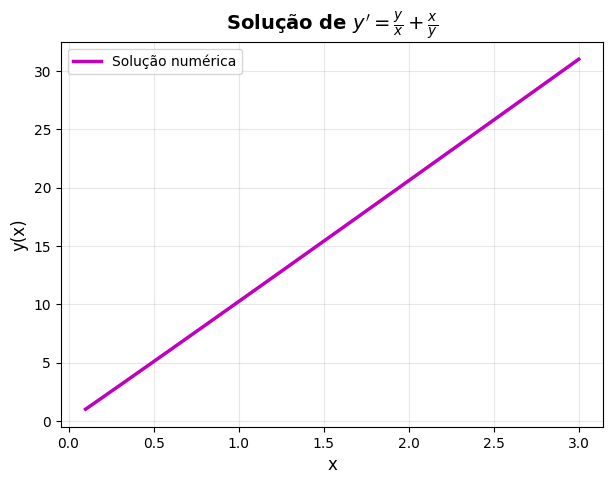

In [10]:
# Solução numérica e gráfico 
def modelo_1e(t, y):
    if t == 0 or y == 0:
        return 0
    return y/t + t/y

y0_1e = [1]  # Condição inicial: y(0.5) = 1
t_span_1e = (0.1, 3)
t_eval_1e = np.linspace(0.1, 3, 100)
sol_1e_num = solve_ivp(modelo_1e, t_span_1e, y0_1e, t_eval=t_eval_1e, method='RK45')

plt.figure(figsize=(7, 5))
plt.plot(sol_1e_num.t, sol_1e_num.y[0], 'm-', linewidth=2.5, label='Solução numérica')
plt.title("Solução de $y' = \\frac{y}{x} + \\frac{x}{y}$", fontsize=14, fontweight='bold')
plt.xlabel("x", fontsize=12)
plt.ylabel("y(x)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()
